<h1>Linear Regression Model</h1>

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



nurses = pd.read_csv("nurses.csv")
nurses.drop(axis=1, columns=['JobTitle'], inplace=True)
nurses['BasePay'].isnull().values.any()
nurses.dropna()

,BasePay,Year
0,174044.89,2012
1,129121.08,2012
2,134022.00,2012
3,134022.00,2012
4,133533.60,2012
...,...,...
9191,4176.00,2018
9192,4337.98,2018
9193,4982.40,2018
9194,4048.80,2018


In [21]:
X_train, X_test, y_train, y_test = train_test_split(nurses.BasePay, nurses.Year, random_state=3, test_size=.20)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 13)                26        
_________________________________________________________________
dense_19 (Dense)             (None, 7)                 98        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 8         
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________
None


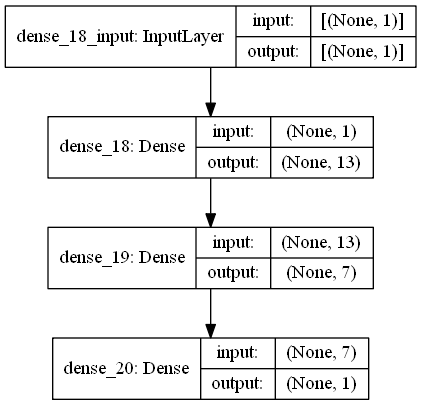

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
import tensorflow as tf

# The network will have three hidden layers with an arbitrary number of nodes in each layer.
#def baseline_model():
    # create model
model = Sequential()
model.add(Dense(13, input_dim=1, kernel_initializer='normal', activation='relu'))
model.add(Dense(7, input_dim=1, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
print(model.summary()) 
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/50
1471/1471 [==============================] - 2s 955us/step - loss: 3830462.5000 - mean_squared_error: 3830462.5000 - val_loss: 4052441.0000 - val_mean_squared_error: 4052441.0000
Epoch 2/50
1471/1471 [==============================] - 1s 834us/step - loss: 4047413.0000 - mean_squared_error: 4047413.0000 - val_loss: 4042801.7500 - val_mean_squared_error: 4042801.7500
Epoch 3/50
1471/1471 [==============================] - 1s 769us/step - loss: 4035161.5000 - mean_squared_error: 4035161.5000 - val_loss: 4026279.7500 - val_mean_squared_error: 4026279.7500
Epoch 4/50
1471/1471 [==============================] - 1s 754us/step - loss: 4008070.0000 - mean_squared_error: 4008070.0000 - val_loss: 3983273.5000 - val_mean_squared_error: 3983273.5000
Epoch 5/50
1471/1471 [==============================] - 1s 793us/step - loss: 3933371.2500 - mean_squared_error: 3933371.2500 - val_loss: 3867474.0000 - val_mean_squared_error: 3867474.0000
Epoch 6/50
1471/1471 [============================

1471/1471 [==============================] - 1s 803us/step - loss: 4.1297 - mean_squared_error: 4.1297 - val_loss: 4.6482 - val_mean_squared_error: 4.6482
Epoch 48/50
1471/1471 [==============================] - 1s 878us/step - loss: 4.1135 - mean_squared_error: 4.1135 - val_loss: 4.0776 - val_mean_squared_error: 4.0776
Epoch 49/50
1471/1471 [==============================] - 1s 907us/step - loss: 4.1275 - mean_squared_error: 4.1275 - val_loss: 4.2228 - val_mean_squared_error: 4.2228
Epoch 50/50
1471/1471 [==============================] - 1s 834us/step - loss: 4.1165 - mean_squared_error: 4.1165 - val_loss: 4.2131 - val_mean_squared_error: 4.2131


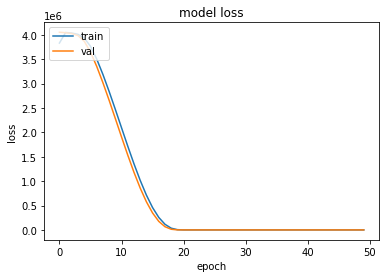

In [32]:
import keras
from matplotlib import pyplot as plt

history = model.fit(X_train, y_train, epochs=50, validation_split=.2, batch_size=4)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [34]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)
modelcheckpoint = ModelCheckpoint('my_best_model.h5', monitor='loss', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, epochs=5, batch_size=48, validation_split=0.2, callbacks=[earlystop,modelcheckpoint])

Epoch 1/5
123/123 [==============================] - 1s 3ms/step - loss: 4.0604 - mean_squared_error: 4.0604 - val_loss: 4.0737 - val_mean_squared_error: 4.0737

Epoch 00001: loss improved from -inf to 4.06039, saving model to my_best_model.h5
Epoch 2/5
123/123 [==============================] - 0s 1ms/step - loss: 4.0655 - mean_squared_error: 4.0655 - val_loss: 4.0854 - val_mean_squared_error: 4.0854

Epoch 00002: loss improved from 4.06039 to 4.06554, saving model to my_best_model.h5
Epoch 3/5
123/123 [==============================] - 0s 1ms/step - loss: 4.0573 - mean_squared_error: 4.0573 - val_loss: 4.0707 - val_mean_squared_error: 4.0707

Epoch 00003: loss did not improve from 4.06554
Epoch 4/5
123/123 [==============================] - 0s 2ms/step - loss: 4.0651 - mean_squared_error: 4.0651 - val_loss: 4.0705 - val_mean_squared_error: 4.0705

Epoch 00004: loss did not improve from 4.06554
Epoch 5/5
123/123 [==============================] - 0s 2ms/step - loss: 4.0586 - mean_squa

In [37]:
new_model = tf.keras.models.load_model('my_best_model.h5')
new_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
new_model.evaluate(X_test,y_test)

58/58 [==============================] - 0s 577us/step - loss: 1.7438 - mean_absolute_error: 1.7438


[1.743767499923706, 1.743767499923706]

<h2>Findings</h2>

When running the models using Sci kit learn I wasn't able to get the best results. 
However after switching to a deep connected neural network I was able to get a mean loss error of 1.74 which is pretty insane.
I also believe if I hypertune it a bit more I could probably get it really close to 0 by playing around with amount of epochs, as I noticed the more epochs I ran the smarter my model was becoming. I actually want to test it out on 100 epochs to see if my theory is correct.

Epoch 1/100
1471/1471 [==============================] - 1s 856us/step - loss: 4.1323 - mean_squared_error: 4.1323 - val_loss: 4.2278 - val_mean_squared_error: 4.2278
Epoch 2/100
1471/1471 [==============================] - 1s 864us/step - loss: 4.1175 - mean_squared_error: 4.1175 - val_loss: 4.1014 - val_mean_squared_error: 4.1014
Epoch 3/100
1471/1471 [==============================] - 1s 794us/step - loss: 4.1214 - mean_squared_error: 4.1214 - val_loss: 4.3220 - val_mean_squared_error: 4.3220
Epoch 4/100
1471/1471 [==============================] - 1s 807us/step - loss: 4.1178 - mean_squared_error: 4.1178 - val_loss: 4.1781 - val_mean_squared_error: 4.1781
Epoch 5/100
1471/1471 [==============================] - 1s 906us/step - loss: 4.1173 - mean_squared_error: 4.1173 - val_loss: 4.0867 - val_mean_squared_error: 4.0867
Epoch 6/100
1471/1471 [==============================] - 1s 809us/step - loss: 4.1154 - mean_squared_error: 4.1154 - val_loss: 4.1139 - val_mean_squared_error: 4.113

Epoch 50/100
1471/1471 [==============================] - 1s 716us/step - loss: 4.1286 - mean_squared_error: 4.1286 - val_loss: 4.0703 - val_mean_squared_error: 4.0703
Epoch 51/100
1471/1471 [==============================] - 1s 754us/step - loss: 4.1287 - mean_squared_error: 4.1287 - val_loss: 4.0735 - val_mean_squared_error: 4.0735
Epoch 52/100
1471/1471 [==============================] - 1s 843us/step - loss: 4.1330 - mean_squared_error: 4.1330 - val_loss: 4.1740 - val_mean_squared_error: 4.1740
Epoch 53/100
1471/1471 [==============================] - 1s 819us/step - loss: 4.1279 - mean_squared_error: 4.1279 - val_loss: 4.1423 - val_mean_squared_error: 4.1423
Epoch 54/100
1471/1471 [==============================] - 1s 786us/step - loss: 4.1109 - mean_squared_error: 4.1109 - val_loss: 4.1118 - val_mean_squared_error: 4.1118
Epoch 55/100
1471/1471 [==============================] - 1s 730us/step - loss: 4.1061 - mean_squared_error: 4.1061 - val_loss: 4.1773 - val_mean_squared_error:

Epoch 99/100
1471/1471 [==============================] - 1s 823us/step - loss: 4.1357 - mean_squared_error: 4.1357 - val_loss: 4.0709 - val_mean_squared_error: 4.0709
Epoch 100/100
1471/1471 [==============================] - 1s 779us/step - loss: 4.1397 - mean_squared_error: 4.1397 - val_loss: 4.2770 - val_mean_squared_error: 4.2770


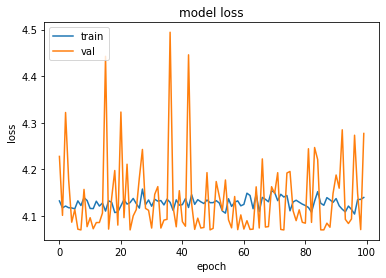

In [41]:
history = model.fit(X_train, y_train, epochs=100, validation_split=.2, batch_size=4)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [42]:
earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)
modelcheckpoint = ModelCheckpoint('my_best_model.h5', monitor='loss', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, epochs=5, batch_size=48, validation_split=0.2, callbacks=[earlystop,modelcheckpoint])

Epoch 1/5
123/123 [==============================] - 0s 2ms/step - loss: 4.0612 - mean_squared_error: 4.0612 - val_loss: 4.0711 - val_mean_squared_error: 4.0711

Epoch 00001: loss improved from -inf to 4.06115, saving model to my_best_model.h5
Epoch 2/5
123/123 [==============================] - 0s 1ms/step - loss: 4.0635 - mean_squared_error: 4.0635 - val_loss: 4.0910 - val_mean_squared_error: 4.0910

Epoch 00002: loss improved from 4.06115 to 4.06354, saving model to my_best_model.h5
Epoch 3/5
123/123 [==============================] - 0s 1ms/step - loss: 4.0540 - mean_squared_error: 4.0540 - val_loss: 4.0928 - val_mean_squared_error: 4.0928

Epoch 00003: loss did not improve from 4.06354
Epoch 00003: early stopping


In [44]:
new_model = tf.keras.models.load_model('my_best_model.h5')
new_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
new_model.evaluate(X_test,y_test)

58/58 [==============================] - 0s 595us/step - loss: 1.7419 - mean_absolute_error: 1.7419


[1.741896152496338, 1.741896152496338]

Okay after running the model there was only a slight improvement of .02. 